In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *
from MicrogridPSO_pareto_animation import *
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# inspect function
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))
print(dir(Make_animation))

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [3]:
# How to initialize
# Class check
# CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

# 初期値を設定
PSO.set_initial_input_values({"number_demand": 1,
                              "pv_capacity_per_unit": 245,
                              "wind_capacity_per_unit": 2.3,
                              "SOC_max[%]": 0.8,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })

# 初期値を設定
PSO.set_initial_cost_parameters({"It_PV_1kW[yen/year]": [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_PV_1kW[yen/year]": [4329] * 20,
                                 "Ft_PV_1kW[yen/year]": [0]*20,
                                 "It_Wind_1kW[yen/year]": [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_Wind_1kW[yen/year]": [662.785213] * 20,
                                 "Ft_Wind_1kW[yen/year]": [0]*20,
                                 "It_Diesel_1kW[yen/year]": [33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11,
                                                             33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11],
                                 "Mt_Diesel_1kW[yen/year]": [8.8] * 20,
                                 "Diesel_Pf": 129,
                                 "Diesel_Adg": 0.2461,
                                 "Diesel_Bdg": 0.081451,
                                 "It_Battery_1kW[yen/year]": [13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0],
                                 "Mt_Battery_1kW[yen/year]": [1100] * 20,
                                 "Ft_Battery_1kW[yen/year]": [0]*20,
                                 "Sell_income_from_trashed[kWh/yen]": [0]*20,
                                 "r[yen/year]": [0.0234375]*20,
                                 "operation_year": list(range(1, 21))
                                 })

# PSOの中身を確認
# print(dir(PSO))
# print(vars(PSO))
# len(PSO.Target_input.index)

In [4]:
%%time

#計算結果を実行
iterations_PSO(PSO)

Inform the number of iterations: 1
Inform the number of particles: 1
Inform w: 0.6
Inform c1: 0.7
Inform c2: 0.8
{'pv_cap_max': 0, 'wind_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 1 n_particles: 1 w: 0.6 c1: 0.7 c2: 0.8 particle: {'particle_position_vector': array([[2.24800000e+03, 1.93377105e+01, 1.82912077e+01, 2.03923568e+00]]), 'personal_best_position': array([[2.24800000e+03, 1.93377105e+01, 1.82912077e+01, 2.03923568e+00]]), 'personal_best_fitness_value': array([inf]), 'global_best_fitness_value': inf, 'global_best_position': array([[2.24800000e+03, 1.93377105e+01, 1.82912077e+01, 2.03923568e+00]]), 'velocity_vector': [array([0, 0, 0, 0])], 'previous_velocity_vector': [array([0, 0, 0, 0])], 'iteration': 0, 'range_vector': [5000, 20, 40, 20]}
-------iteration = 0 -----------
[[2.24800000e+03 1.93377105e+01 1.82912077e+01 2.03923568e+00]]
      * 2349 [h]-----PSO.check is False.
      * 2349h: Error! diesel capacity is over!
      *PSO.diesel_max | PSO.p_diese

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df.to_csv('Result/PSO_result_no_income.csv',encoding="SHIFT-JIS")  
df

,Check,Diesel_Cf,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv+wind-demand,trashed power,wind
0,True,0.000000,48.880291,4.234484,0.000000,0.097000,0.097000,0.000000,0h: discharging 0.097[kWh].,0,0.000000,-0.097000,0,0.000000
0,True,0.000000,47.760583,4.137484,0.000000,0.097000,0.097000,0.000000,1h: discharging 0.097[kWh].,1,0.000000,-0.097000,0,0.000000
0,True,0.000000,46.640874,4.040484,0.000000,0.097000,0.097000,0.000000,2h: discharging 0.097[kWh].,2,0.000000,-0.097000,0,0.000000
0,True,0.000000,45.521166,3.943484,0.000000,0.097000,0.097000,0.000000,3h: discharging 0.097[kWh].,3,0.000000,-0.097000,0,0.000000
0,True,0.000000,44.401457,3.846484,0.000000,0.097000,0.097000,0.000000,4h: discharging 0.097[kWh].,4,0.000000,-0.097000,0,0.000000
0,True,0.000000,43.281749,3.749484,0.000000,0.097000,0.097000,0.000000,5h: discharging 0.097[kWh].,5,0.000000,-0.097000,0,0.000000
0,True,0.000000,42.162040,3.652484,0.000000,0.097000,0.097000,0.000000,6h: discharging 0.097[kWh].,6,0.000000,-0.097000,0,0.000000
0,True,0.000000,40.078949,3.472027,0.000000,0.180458,0.208452,0.000000,7h: discharging 0.18[kWh].,7,0.005390,-0.180458,0,0.022604
0,True,0.000000,38.021016,3.293749,0.000000,0.178278,0.295700,0.000000,8h: discharging 0.178[kWh].,8,0.070874,-0.178278,0,0.046548
0,True,0.000000,37.217946,3.224179,0.000000,0.069570,0.255900,0.000000,9h: discharging 0.07[kWh].,9,0.186330,-0.069570,0,0.000000


In [6]:
# plot_list
best_cost_list = np.array(PSO.best_cost_list)
gbest_list = np.array(PSO.global_best_list)
iteration_list = np.array(PSO.iteration_list)
plot_list = pd.DataFrame({'iteration': np.array(PSO.iteration_list)+1,
                          'cost': np.array(PSO.best_cost_list)})

In [7]:
PSO.best["variables"]

{'pv_cap_max': 592.0187972056673,
 'wind_cap_max': 7.1991603061742975,
 'battery_cap_max': 8.662968869220018,
 'battery_max': 6.930375095376014,
 'battery_min': 1.7325937738440036,
 'diesel_max': 17.634957756612305,
 'demand_sum': 5230.855261158001,
 'pv_power_sum': 412.7024114757596,
 'wind_power_sum': 2173.81105417686,
 'battery_charging_power_sum': 1096.7128118407102,
 'battery_discharging_power_sum': 1094.113921179944,
 'diesel_power_sum': 2646.940686166146,
 'trashed_power_sum': 0,
 'Diesel_Cf_sum': 158901.17907193053}

In [8]:
plot_list

,iteration,cost
0,1,7.524048e+07


/home/yuichiro/miniconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  ax.set_xlim(left, right)


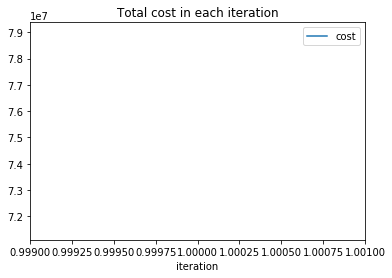

In [9]:
plot_list.plot(x="iteration", y="cost", title='Total cost in each iteration')
plt.savefig('Result/Total cost in each iteration.png')

In [10]:
COST_PV = (PSO.best["variables"]["pv_cap_max"] / 1000) * (np.array(PSO.initial_cost_parameters["It_PV_1kW[yen/year]"]
                                                                   ) + np.array(PSO.initial_cost_parameters["Mt_PV_1kW[yen/year]"]))
COST_Wind = (PSO.best["variables"]["wind_cap_max"]
             * (np.array(PSO.initial_cost_parameters["It_Wind_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Wind_1kW[yen/year]"])))
COST_Diesel = (PSO.best["variables"]["diesel_max"]
               * (np.array(PSO.initial_cost_parameters["It_Diesel_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Diesel_1kW[yen/year]"]))) + np.array(PSO.best["variables"]["Diesel_Cf_sum"] * 20)
COST_Battery = PSO.best["variables"]["battery_cap_max"] * (np.array(
    PSO.initial_cost_parameters["It_Battery_1kW[yen/year]"]) + np.array(PSO.initial_cost_parameters["Mt_Battery_1kW[yen/year]"]))

COST = {
    "COST PV": np.round(COST_PV, 2),
    "TOTAL COST PV": np.round(np.sum(COST_PV), 2),
    "LCOE PV": np.round(np.sum(COST_PV)/(20*PSO.best["variables"]["pv_power_sum"]), 2),
    "COST Wind": np.round(COST_Wind, 2),
    "TOTAL COST Wind": np.round(np.sum(COST_Wind), 2),
    "LCOE WIND": np.round(np.sum(COST_Wind)/(20*PSO.best["variables"]["wind_power_sum"]), 2),
    "COST DIESEL": np.round(COST_Diesel, 2),
    "TOTAL COST DIESEL": np.round(np.sum(COST_Diesel), 2),
    "LCOE DIESEL": np.round(np.sum(COST_Diesel)/(20*PSO.best["variables"]["diesel_power_sum"]), 2),
    "COST BATTERY": np.round(COST_Battery, 2),
    "TOTAL COST BATTERY": np.round(np.sum(COST_Battery), 2),
    "LCOE BATTERY": np.round(np.sum(COST_Battery)/(20*PSO.best["variables"]["battery_discharging_power_sum"]), 2),
}

In [11]:
# 計算結果テキストファイルの作成
f = open('Result/PSO_result_parameters.txt', 'w')  # 書き込みモードで開く
f_content = 'LCOE:'+str(np.sum(PSO.best['SCL'])/np.sum(PSO.best['SEL']))+'\nglobal_best_position:'+str(PSO.best['global_best_position'])+'\nglobal_best_fitness_value: '+str(PSO.best['global_best_fitness_value'])+"\nCOST:"+str(COST)+"\nPSO.best[variables]:"\
    + str(PSO.best["variables"]) + '\nPSO.initial_cost_parameters:' + str(
        PSO.initial_cost_parameters)+'\nSCL:'+str(PSO.best['SCL'])+'\nSEL:'+str(PSO.best['SEL'])
f.write(f_content)  # 引数の文字列をファイルに書き込む
f.close()  # ファイルを閉じる

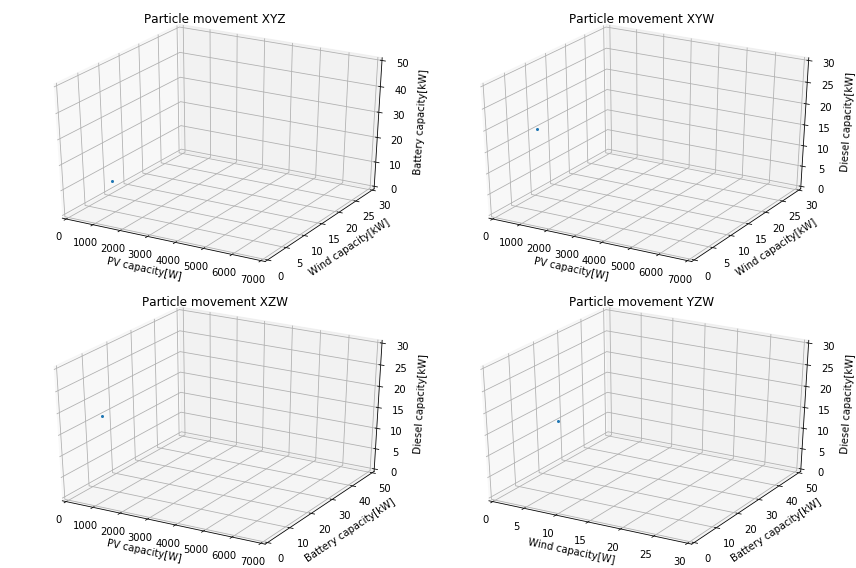

In [12]:
#アニメーションの書き出し
Make_animation("Result/all_particle_data.npy")

In [13]:
PSO.best['SCL']

array([6362114.62686001, 3785693.34273372, 3195001.24681956,
       3787771.74324142, 3905069.4570676 , 3195042.38066347,
       3787772.8861812 , 3787772.88619557, 3312338.97968229,
       3787772.88619591, 3787772.88619591, 3195042.38119306,
       3905069.48468515, 3787772.88619591, 3195042.38119306,
       3787772.88619591, 3905069.48468515, 3195042.38119306,
       3787772.88619591, 3787772.88619591])

In [14]:
PSO.best['SEL']

array([6182.66193392, 6324.09414433, 6327.48660912, 6327.56616367,
       6327.56802825, 6327.56807195, 6327.56807297, 6327.568073  ,
       6327.568073  , 6327.568073  , 6327.568073  , 6327.568073  ,
       6327.568073  , 6327.568073  , 6327.568073  , 6327.568073  ,
       6327.568073  , 6327.568073  , 6327.568073  , 6327.568073  ])

In [15]:
dir(PSO)

['Diesel_Cf',
 'Diesel_fc',
 'SCL',
 'SEL',
 'SOC_max',
 'SOC_min',
 'Target_input',
 'Target_input_len',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'all_particle_data',
 'battery_cap_max',
 'battery_charging_power',
 'battery_discharging_power',
 'battery_max',
 'battery_min',
 'battery_need',
 'battery_need_pv',
 'best',
 'best_cost_list',
 'check',
 'df',
 'diesel_max',
 'fitness_variable_parameters',
 'flowchart_parameters',
 'flowchart_root',
 'global_best_fitness_value',
 'global_best_list',
 'global_best_position',
 'h',
 'initial_cost_parameters',
 'initial_input_values',
 'iteration_list',
 'np_PV_efficient',
 'np_Wind_efficient',
 'np_demand',
 'number_d